<a href="https://colab.research.google.com/github/ClaudeCoulombe/VIARENA/blob/master/Labos/Mon_premier_reseau_de_neurones-Prediction_poids.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Rappel - Fonctionnement d'un carnet web iPython

* Pour exécuter le code contenu dans une cellule d'un carnet iPython, cliquez dans la cellule et faites (⇧↵, shift-enter) 
* Le code d'un carnet iPython s'exécute séquentiellement de haut en bas de la page. Souvent, l'importation d'une bibliothèque Python ou l'initialisation d'une variable est préalable à l'exécution d'une cellule située plus bas. Il est donc recommandé d'exécuter les cellules en séquence. Enfin, méfiez-vous des retours en arrière qui peuvent réinitialiser certaines variables.

# Mon premier réseau de neurones - Perceptron simple avec Keras

## Prédiction du poids à partir du genre et de la taille d'une personne

Vous allez créer votre premier réseau de neurones. Il s'agit d'un perceptron simple, ne comportant qu'un seul neurone, mais capable de prédire le poids approximatif d'une personne à partir de son genre (homme ou femme) et de sa taille.

### Détermination de la classe-cible et des prédicteurs

La cible (ou classe-cible) sera donc le `poids` et les prédicteurs (ou attributs-prédicteurs) seront: le `genre` et la `taille`.    

Puisque la classe-cible est un attribut numérique continu (un nombre avec des décimales), nous allons donc réaliser une <b>régression</b>.

**Note**: Il n'est pas important de comprendre le détail du code informatique pour le moment. Ne vous inquiétez pas, des explications détaillées suivront bientôt.

# Acquisition des données...

### Source des données: 

Nous utiliserons un jeu de données de 10 000 mesures de taille et de poids pour les hommes et les femmes disponibles sur <a href="https://github.com/johnmyleswhite/ML_for_Hackers/tree/master/05-Regression/data" target='_blank'>l'espace GitHub</a> du livre Machine Learning for Hackers, Drew Conway & John Myles-While, O'Reilly Media.

Référence: Drew Conway, John Myles-While (2012). Machine Learning for Hackers. O'Reilly Media.

Le fichier **01_heights_weights_genders.csv** a été renommé **genre_taille_poids.csv**

#### Acquisition par téléchargement du jeu de données

In [417]:
!wget "https://github.com/johnmyleswhite/ML_for_Hackers/blob/master/05-Regression/data/01_heights_weights_genders.csv?raw=True" -O genre_taille_poids.csv


--2021-03-22 05:25:46--  https://github.com/johnmyleswhite/ML_for_Hackers/blob/master/05-Regression/data/01_heights_weights_genders.csv?raw=True
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/johnmyleswhite/ML_for_Hackers/raw/master/05-Regression/data/01_heights_weights_genders.csv [following]
--2021-03-22 05:25:46--  https://github.com/johnmyleswhite/ML_for_Hackers/raw/master/05-Regression/data/01_heights_weights_genders.csv
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/05-Regression/data/01_heights_weights_genders.csv [following]
--2021-03-22 05:25:46--  https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/05-Regression/data/01_heights_weights_genders.csv
Resolving raw.githubusercontent.

#### Fonctions de conversion

Notez que la taille est en pouces et le poids en livres, des unités de mesure impériales établies par les Britanniques et encore communément utilisés en Amérique du Nord et au Québec. Ci-dessous de petites fonctions de conversion pour les personnes plus familières du système international d'unités (SI).

In [418]:
def conv_cm_en_po(taille_centimetres):
    return taille_centimetres/2.54

def con_po_en_cm(taille_pouces):
    return taille_pouces*2.54

def conv_kg_en_livres(masse_en_kg):
    return masse_en_kg*2.20462

def conv_livres_en_kg(poids_en_livres):
    return poids_en_livres/2.20462

## Préparation des données...

In [419]:
import tensorflow as tf
import numpy as np
import pandas as pd

# lecture des données et stockage dans un tableau DataFrame Pandas
genre_taille_poids_df = pd.read_csv("genre_taille_poids.csv")
# modification des noms d'attributs (i.e. colonnes)
genre_taille_poids_df.columns = ['genre','taille','poids']
# examen d'une dizaines d'exemples tirés au hasard
genre_taille_poids_df.sample(n=10, random_state=42)

,genre,taille,poids
6252,Female,68.687232,173.115813
4684,Male,68.829334,195.162042
1731,Male,66.398128,170.217451
4742,Male,71.929340,215.049660
4521,Male,67.042903,182.721452
6340,Female,65.310436,136.434393
576,Male,66.045444,169.326284
5202,Female,66.759071,150.881330
6363,Female,62.598648,114.766882
439,Male,63.596455,144.591922


### Encodage des attributs catégoriels 

Rappelons qu'un attribut catégoriel prend des valeurs d'étiquettes symboliques. Ici l'attribut `genre` prend les valeurs 'Male' et 'Female'. Les algorithmes d'apprentissage automatique dont les réseaux de neurones exigent que les variables d'entrée soient des nombres. Il faut donc encoder les données catégorielles en nombres avant de les utiliser pour entraîner un modèle.

Ici, nous ferons un simple remplacement de valeur avec la fonction `.replace()` de Pandas.

In [420]:
genre_taille_poids_df = genre_taille_poids_df.replace('Male', 1)
genre_taille_poids_df = genre_taille_poids_df.replace('Female', 0)
genre_taille_poids_df.sample(n=10, random_state=42)

,genre,taille,poids
6252,0,68.687232,173.115813
4684,1,68.829334,195.162042
1731,1,66.398128,170.217451
4742,1,71.929340,215.049660
4521,1,67.042903,182.721452
6340,0,65.310436,136.434393
576,1,66.045444,169.326284
5202,0,66.759071,150.881330
6363,0,62.598648,114.766882
439,1,63.596455,144.591922


### Séparation de la cible et des prédicteurs


In [421]:
classe_cible = genre_taille_poids_df['poids'].values
print("classe_cible:\n",classe_cible)
print("classe_cible.shape:",classe_cible.shape)
predicteurs = genre_taille_poids_df.drop(['poids'], axis=1).values
print("\npredicteurs:\n",predicteurs)
print("predicteurs.shape:",predicteurs.shape)

classe_cible:
 [241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]
classe_cible.shape: (10000,)

predicteurs:
 [[ 1.         73.84701702]
 [ 1.         68.78190405]
 [ 1.         74.11010539]
 ...
 [ 0.         63.86799221]
 [ 0.         69.03424313]
 [ 0.         61.94424588]]
predicteurs.shape: (10000, 2)


### Division en données d'entraînement et de test - fonction Sklearn `train_test_split()`

Nous allons retenir une partie des données dans un jeu de données de test que l'algorithme ne verra pas et nous utiliserons ces données pour avoir une idée des performances du modèle sur des données inconnues.

Nous diviserons l'ensemble de données en deux, dont typiquement 80 % serviront à l'entraînement, à l'évaluation et à la sélection parmi nos modèles, et 20 % seront retenues comme ensemble de données de test.

In [422]:
from sklearn.model_selection import train_test_split

# Le jeu de données de test contient 20% des données initiales
# Note: ce ratio peut varier en fonction de la taille du jeu de données
test_ratio = 0.20

# Isoler les données de test 
predicteurs_entr, predicteurs_test, cibles_entr, cibles_test = train_test_split(predicteurs,
                                                                              classe_cible,
                                                                              test_size=test_ratio,
                                                                              random_state=42)

In [423]:
print("Dimensions de predicteurs entrainement:",predicteurs_entr.shape)
print("Dimensions de predicteurs test:",predicteurs_test.shape)
print("Dimensions de cibles entrainement:",cibles_entr.shape)
print("Dimensions de cibles test:",cibles_test.shape)

Dimensions de predicteurs entrainement: (8000, 2)
Dimensions de predicteurs test: (2000, 2)
Dimensions de cibles entrainement: (8000,)
Dimensions de cibles test: (2000,)


## Création d'un réseau de neurones

Un perceptron simple à un seul neurone connecté à toutes les entrées (attributs prédicteurs) et avec une sortie 

In [424]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

reseau_de_neurones = Sequential()
reseau_de_neurones.add(Dense(units=1, input_shape=[2]))

print("Architecture du réseau de neurones:\n")
print(reseau_de_neurones.summary())


Architecture du réseau de neurones:

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
None


### Compilation du réseau de neurones

In [425]:
reseau_de_neurones.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                           loss='mean_squared_error')
print("Le réseau de neurones a été compilé!")

Le réseau de neurones a été compilé!


### Entraînement du réseau de neurones

In [426]:
traces_entrainement = reseau_de_neurones.fit(predicteurs_entr,cibles_entr,
                                             epochs=500,
                                             verbose=0)
print("Le réseau de neurones a été entraîné!")

Le réseau de neurones a été entraîné!


### Affichage de l'évolution de la fonction de coût

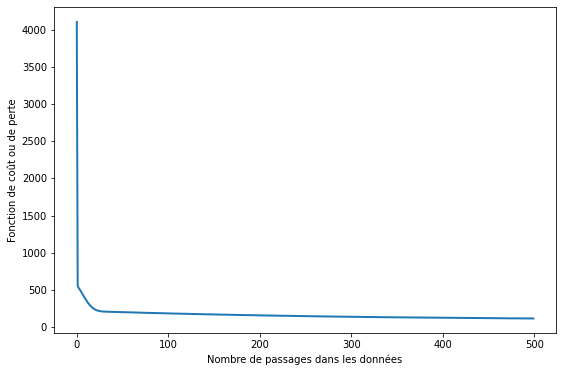

In [427]:
import matplotlib.pyplot as plt
nombre_dor = 1.618
hauteur = 6
longueur = int(nombre_dor * hauteur)
_ = plt.figure(figsize=(longueur,hauteur))
plt.xlabel('Nombre de passages dans les données')
plt.ylabel("Fonction de coût ou de perte")
_ = plt.plot(traces_entrainement.history['loss'],linewidth=2)
plt.show()

### Validation du modèle sur les données de test
Nous allons valider le modèle que notre réseau de neurones a appris avec des données de test qui ne faisaient pas partie des données d'entraînement.

In [428]:
from sklearn.metrics import mean_squared_error

predictions_poids_test = reseau_de_neurones.predict(predicteurs_test)

# Racine de l'erreur quadratique moyenne
print("> REQM: {:.2f}".format(mean_squared_error(cibles_test, predictions_poids_test, squared=False)))

> REQM: 10.83


En fait ce que cela veut dire, c'est que notre petit réseau à un seul neurone est capable de déterminer le poids d'une personne à partir de son genre et de sa taille à 11 livres près (~5 Kg). Du moins sur le jeu de données d'entraînement. 

### Entraînement sur toutes les données

Nous allons maintenant entraîner notre modèle avec toutes les données pour maximiser l'emploi des données. 

In [429]:
reseau_de_neurones.fit(predicteurs,classe_cible,
                       epochs=500,
                       verbose=0)
print("Le réseau de neurones a été entraîné sur toutes les données!")

Le réseau de neurones a été entraîné sur toutes les données!


## Utilisation du modèle entraîné en production

Nous allons utiliser le modèle entraîné sur des nouvelles données qui ne font pas partie du jeu de données d'entraînement.

In [430]:
# homme, 5 pieds 8 po, poids connu: 180 livres
genre = 1
grandeur = 5*12+8
nouveau_predicteur = np.array([[genre,grandeur]])
prediction_poids = reseau_de_neurones.predict(nouveau_predicteur)
print("Poids prédit: {:.2f} livres".format(prediction_poids[0][0]))
print("Erreur: {:.2f} livres".format(abs(180-prediction_poids[0][0])))

Poids prédit: 181.68 livres
Erreur: 1.68 livres


In [431]:
# femme, 5 pieds 7 po, poids connu: 150 livres 
genre = 0
taille = 5*12+7
nouveau_predicteur = np.array([[genre,taille]])
prediction_poids = reseau_de_neurones.predict(nouveau_predicteur)
print("Poids prédit: {:.2f} livres".format(prediction_poids[0][0]))
print("Erreur: {:.2f} livres".format(abs(150-prediction_poids[0][0])))

Poids prédit: 154.96 livres
Erreur: 4.96 livres


In [432]:
# homme, 6 pieds, poids connu: 200 livres
genre = 1
taille = 72
nouveau_predicteur = np.array([[genre,taille]])
prediction_poids = reseau_de_neurones.predict(nouveau_predicteur)
print("Poids prédit: {:.2f} livres".format(prediction_poids[0][0]))
print("Erreur: {:.2f} livres".format(abs(200-prediction_poids[0][0])))

Poids prédit: 204.31 livres
Erreur: 4.31 livres


In [434]:
# femme, 1 m 55 ou 155 cm, poid connu: 58 Kg
genre = 0
grandeur = conv_cm_en_po(155)
nouveau_predicteur = np.array([[genre,grandeur]])
prediction_poids = reseau_de_neurones.predict(nouveau_predicteur)
print("Masse prédite: {:.2f} Kg".format(conv_livres_en_kg(prediction_poids[0][0])))
print("Erreur: {:.2f} Kg".format(abs(58-conv_livres_en_kg(prediction_poids[0][0]))))

Masse prédite: 54.96 Kg
Erreur: 3.04 Kg


Vous pouvez constater que le réseau de neurones retourne des valeurs assez proches des vraies valeurs données par nos exemples. Il est important de comprendre que le réseau de neurones n'apprend pas une formule exacte mais bien qu'il calcule itérativement une fonction qui approxime à partir des données.  

## Choses à retenir:

* Le réseau de neurones est capable d'apprendre à approximer une fonction directement à partir des données
* Le processus d'apprentissage est itératif
    